In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

plt.style.use('seaborn-muted')

Coeficientes de Correlación de Pearson:
-> EG vs. 1/1000000 x^3 = 0.620703079693943
-> LU vs. 1/1000000 x^3 = 0.6084083226546125


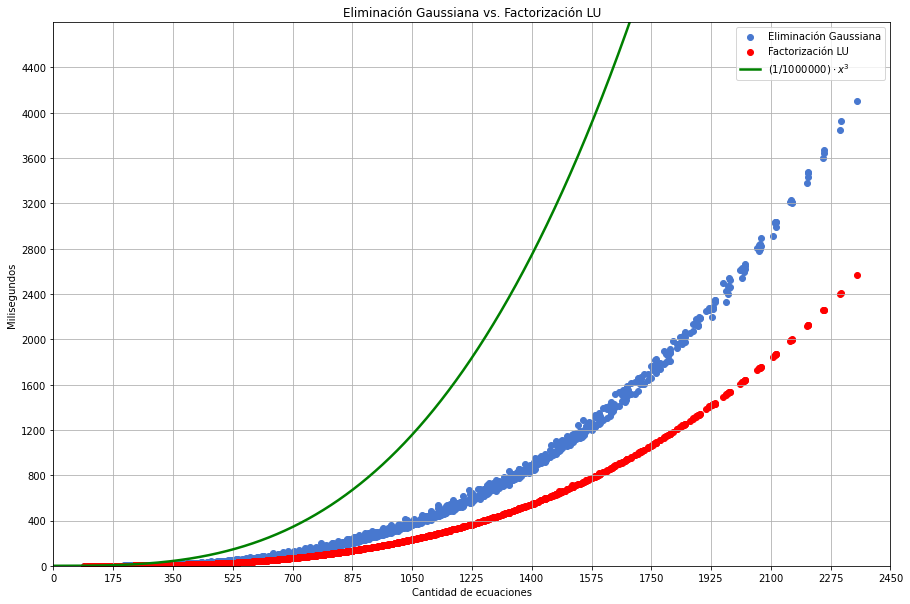

In [ ]:
data = []
with open('./testEGvsLU/results_20220411_001242.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(lu_times) / 1000000

        data.append({
            'size': n*(m-1),
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean
        })

df = pd.DataFrame(data)
fig, (ax) = plt.subplots(1, sharey=True)
fig.set_figwidth(15)
fig.set_figheight(10)
ax.scatter(df['size'], df['eg_mean'])
ax.scatter(df['size'], df['lu_mean'], c='r')

x = np.arange(0,2500,0.01)
f = (x**3)/1000000
line, = ax.plot(x, f, lw=2.5, c = 'g')
ax.set_ylim(0, 4800)
ax.set_xlim(0, 2300)

ax.set_title('Eliminación Gaussiana vs. Factorización LU')
ax.set_ylabel('Milisegundos')
ax.set_xlabel('Cantidad de ecuaciones')
ax.set_yticks(range(0,4800,400))
ax.set_xticks(range(0,2500,175))
ax.grid(visible=True)

ax.legend(['Eliminación Gaussiana', 'Factorización LU', '$(1/1000000) \cdot x^3$'],)

# Cálculo del Coeficiente de correlación de Pearson:
def correlacion_pearson(col1, col2):
    return np.corrcoef(col1, col2)[0,1]

cubicaHasta1600 = [(1/1000000* (x**3)) for x in range(0,1600)]

print('Coeficientes de Correlación de Pearson:')
print('-> EG vs. 1/1000000 x^3 =', correlacion_pearson(df['eg_mean'], cubicaHasta1600))
print('-> LU vs. 1/1000000 x^3 =', correlacion_pearson(df['lu_mean'], cubicaHasta1600))



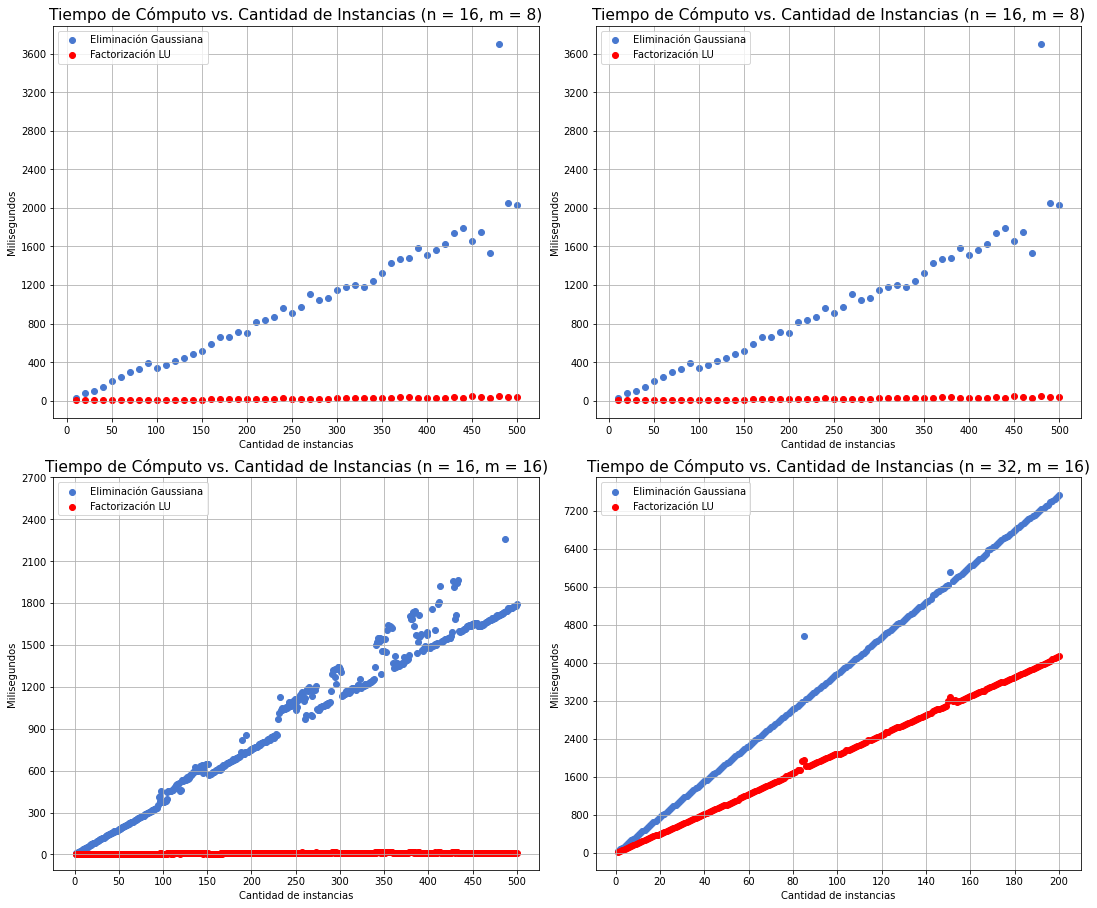

In [31]:
data4 = []
with open('./testEGvsLU/results4_n32_m16_ninst1_200_20220414_204659.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])
        
        ninst = int(result['ninst'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(lu_times) / 1000000

        data4.append({
            'size': n*(m-1),
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean,
            'ninst': ninst
        })
df4 = pd.DataFrame(data4)


data3 = []
with open('./testEGvsLU/results3_20220417_165137.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])
        
        ninst = int(result['ninst'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(lu_times) / 1000000

        data3.append({
            'size': n*(m-1),
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean,
            'ninst': ninst
        })
df3 = pd.DataFrame(data3)


data2 = []
with open('./testEGvsLU/results2_20220417_220323.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])
        size = n*(m-1)
        ninst = int(result['ninst'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(lu_times) / 1000000

        data2.append({
            'size': size,
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean,
            'ninst': ninst
        })
df2 = pd.DataFrame(data2)

data1 = []
with open('./testEGvsLU/results2_20220417_220323.json') as json_file:
    results = json.load(json_file)

    for result in results:
        n = int(result['n'])
        m = int(result['m'])
        size = n*(m-1)
        ninst = int(result['ninst'])

        eg_times = [ int(t) for t in result['EG'] ]        
        eg_mean = np.mean(eg_times) / 1000000

        lu_times = [ int(t) for t in result['LU'] ]
        lu_mean = np.mean(lu_times) / 1000000

        data1.append({
            'size': size,
            'n': n,
            'm': m,
            'eg_mean': eg_mean,
            'lu_mean': lu_mean,
            'ninst': ninst
        })
df1 = pd.DataFrame(data1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)
fig.set_figwidth(15)
fig.set_figheight(12.5)

# dejé ax1 igual a ax2 porque nos faltaba un experimento y acá tengo 4 ax
ax1.scatter(df1['ninst'], df1['eg_mean'])
ax1.scatter(df1['ninst'], df1['lu_mean'], c='r')
ax1.set_title('Tiempo de Cómputo vs. Cantidad de Instancias (n = 16, m = 8)', size = 15.5)
ax1.set_ylabel('Milisegundos')
ax1.set_xlabel('Cantidad de instancias')
ax1.set_yticks(range(0,4000,400))
ax1.set_xticks(range(0,550,50))
ax1.legend(['Eliminación Gaussiana', 'Factorización LU'],)
ax1.grid(visible=True)

ax2.scatter(df2['ninst'], df2['eg_mean'])
ax2.scatter(df2['ninst'], df2['lu_mean'], c='r')
ax2.set_title('Tiempo de Cómputo vs. Cantidad de Instancias (n = 16, m = 8)', size = 15.5)
ax2.set_ylabel('Milisegundos')
ax2.set_xlabel('Cantidad de instancias')
ax2.set_yticks(range(0,4000,400))
ax2.set_xticks(range(0,550,50))
ax2.legend(['Eliminación Gaussiana', 'Factorización LU'],)
ax2.grid(visible=True)

ax3.scatter(df3['ninst'], df3['eg_mean'])
ax3.scatter(df3['ninst'], df3['lu_mean'], c='r')
ax3.set_title('Tiempo de Cómputo vs. Cantidad de Instancias (n = 16, m = 16)', size = 15.5)
ax3.set_ylabel('Milisegundos')
ax3.set_xlabel('Cantidad de instancias')
ax3.set_yticks(range(0,3000,300))
ax3.set_xticks(range(0,550,50))
ax3.legend(['Eliminación Gaussiana', 'Factorización LU'], loc = 'upper left')
ax3.grid(visible=True)

ax4.scatter(df4['ninst'], df4['eg_mean'])
ax4.scatter(df4['ninst'], df4['lu_mean'], c='r')
ax4.set_title('Tiempo de Cómputo vs. Cantidad de Instancias (n = 32, m = 16)', size = 15.5)
ax4.set_ylabel('Milisegundos')
ax4.set_yticks(range(0,8000,800))
ax4.set_xlabel('Cantidad de instancias')
ax4.set_xticks(range(0,210,20))
ax4.legend(['Eliminación Gaussiana', 'Factorización LU'],)
ax4.grid(visible=True)
